In [35]:
library(dplyr, warn=F)
library(ggplot2)

In [7]:
impact_df = 'https://gist.githubusercontent.com/dhimmel/2f5b104990961f72e171/raw/5284a96d2e08de07672150821f768d7f65e456d6/jcr-impact-factors-list-2013.tsv' %>%
  readr::read_tsv() %>%
  dplyr::select(issn, impact_factor)

head(impact_df, 2)

,issn,impact_factor
1,1619-4500,0.73
2,0891-0162,0.856


In [29]:
journal_df = 'data/pubmed-journals.tsv' %>%
  readr::read_tsv()

issn_df = journal_df %>%
  tidyr::gather(key = 'issn_type', value = 'issn', `ISSN (Print)`, `ISSN (Online)`) %>%
  dplyr::distinct() %>%
  dplyr::transmute(journal_nlm_id = NlmId, issn)

head(issn_df, 2)

,journal_nlm_id,issn
1,7708172,0160-6999
2,0431420,0094-6354


In [27]:
impact_df = issn_df %>%
  dplyr::inner_join(impact_df)

head(impact_df)

Joining by: "issn"


,journal_nlm_id,issn,impact_factor
1,0370270,0001-5172,2.355
2,14520300R,0001-527X,1.185
3,8404358,0236-5383,0.504
4,0421520,0001-5342,0.95
5,0370570,0001-5385,0.607
6,0370571,0001-5458,0.359


In [32]:
slope_df = 'data/slopes.tsv' %>%
  readr::read_tsv() %>%
  dplyr::inner_join(impact_df)

head(slope_df)

Joining by: "journal_nlm_id"


,journal_nlm_id,articles,slope,slope_as_percent,p_value,delay_type,issn,impact_factor
1,0111356,163,-473.2081,-368.4048,2.48e-28,publish,0300-8916,0.922
2,101128940,152,-218.7405,-144.2829,4.92e-10,publish,1310-2818,0.622
3,9309609,400,-199.0258,-132.3574,3.94e-67,publish,1064-7481,4.131
4,101234999,268,-166.2133,-273.1157,7.32e-44,publish,1734-1140,1.965
5,101207337,102,-164.5342,-85.0823,0.00253,publish,1808-8694,0.545
6,7809084,164,-137.6801,-213.6393,2.32e-05,publish,0161-8105,5.1


Warning message:
: Removed 15 rows containing non-finite values (stat_smooth).Warning message:
: Removed 15 rows containing missing values (geom_point).

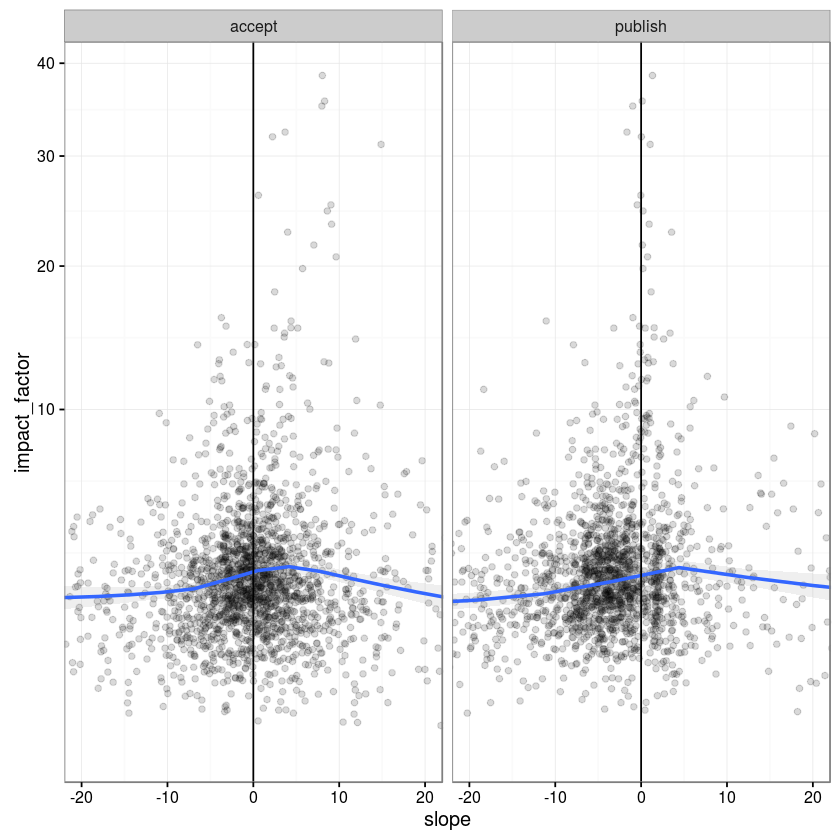

In [47]:
slope_df %>%
  ggplot2::ggplot(aes(x = slope, y = impact_factor)) +
  ggplot2::facet_grid(. ~ delay_type, scales='free_x') +
  ggplot2::geom_point(alpha = 0.15) +
  ggplot2::geom_smooth(alpha = 0.15) +
  ggplot2::geom_vline(xintercept = 0) +
  ggplot2::coord_cartesian(xlim = c(-20, 20)) +
  ggplot2::scale_y_sqrt() +
  ggplot2::theme_bw()

In [30]:
journal_summary_df = 'data/journal-summaries.tsv' %>%
  readr::read_tsv()
head(journal_summary_df)

,journal_nlm_id,journal_abbrev,journal,acceptance_delays,unique_acceptance_dates,unique_acceptance_delays,publication_delays,unique_publication_dates,unique_publication_delays
1,0370270,Acta Anaesthesiol Scand,Acta anaesthesiologica Scandinavica,140,109,92,545,248,70
2,14520300R,Acta Biochim Pol,Acta biochimica Polonica,1303,835,317,990,339,113
3,0421520,Acta Biotheor,Acta biotheoretica,224,175,159,218,175,58
4,0370307,Acta Cytol,Acta cytologica,403,321,163,413,114,169
5,0141053,Acta Haematol,Acta haematologica,977,708,249,794,454,166
6,0370320,Acta Histochem,Acta histochemica,960,690,210,888,597,140
